# <center>Peterside Hospital - Heart Disease Case Study</center>

In [77]:
# Import Libraries

# data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # normalize data btn 0 and 1

# classifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [78]:
# load dataset

df = pd.read_csv('heart.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [79]:
# rename columns (for better understnding and flow of analysis)

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [80]:
# data verification - data type, no. of features and rows, missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [81]:
# statistical analysis of dataset

df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


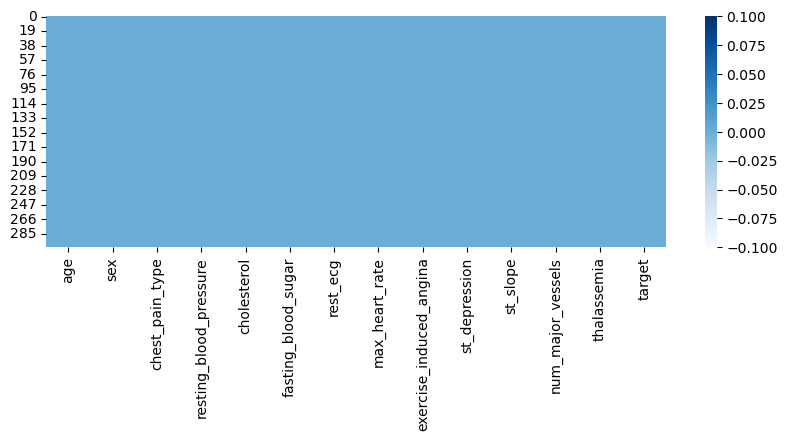

In [82]:
# check missing data
print(df.isnull().sum())

# visualize missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues');

## Exploratory Data Analysis

### Univariate Analysis

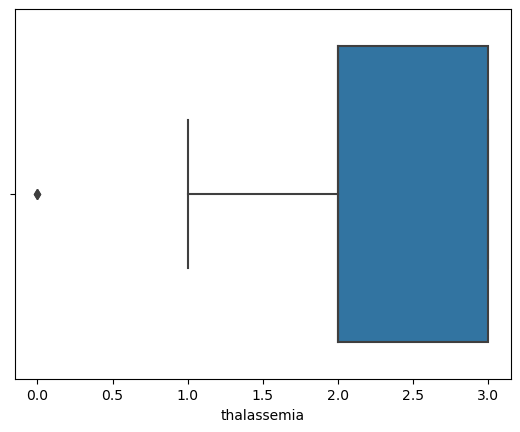

In [83]:
# chaeck for outliers

sns.boxplot(x=df['thalassemia']);

outliers can be observed in thalassemia

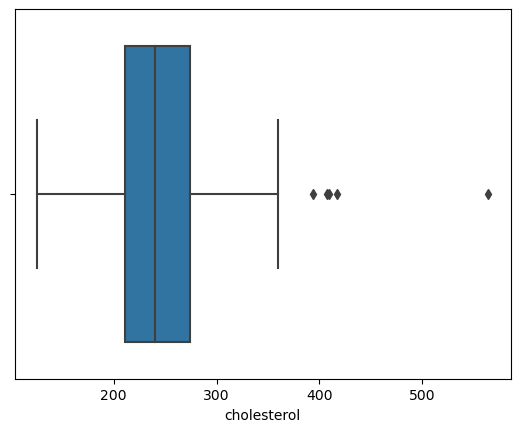

In [84]:
# chaeck for outliers

sns.boxplot(x=df['cholesterol']);

outliers can be observed in cholesterol

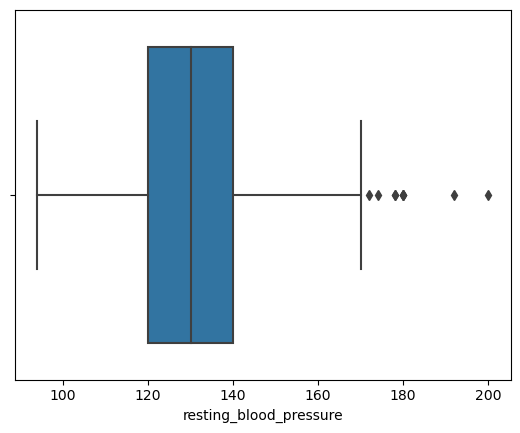

In [85]:
# chaeck for outliers

sns.boxplot(x=df['resting_blood_pressure']);

outliers can be observed in resting_blood_pressure

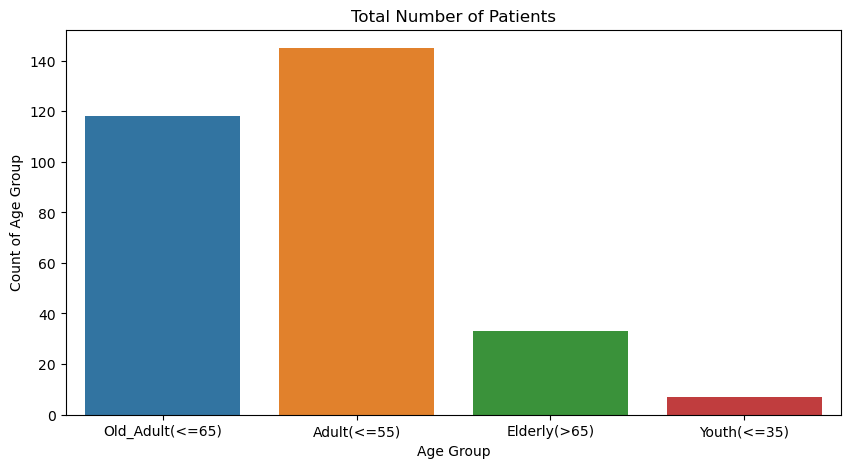

In [86]:
# age grouping

def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old_Adult(<=65)'
    else:
        return 'Elderly(>65)'
    
df['age_bracket'] = df['age'].apply(age_bracket)

# visualize age bracket count
plt.figure(figsize=(10,5))
sns.countplot(x=df['age_bracket'])
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

Adults(<=55) form the largest group of the patient population, followed by Old_Adult(<=65). Youth(<=35) is the least populated patient group.

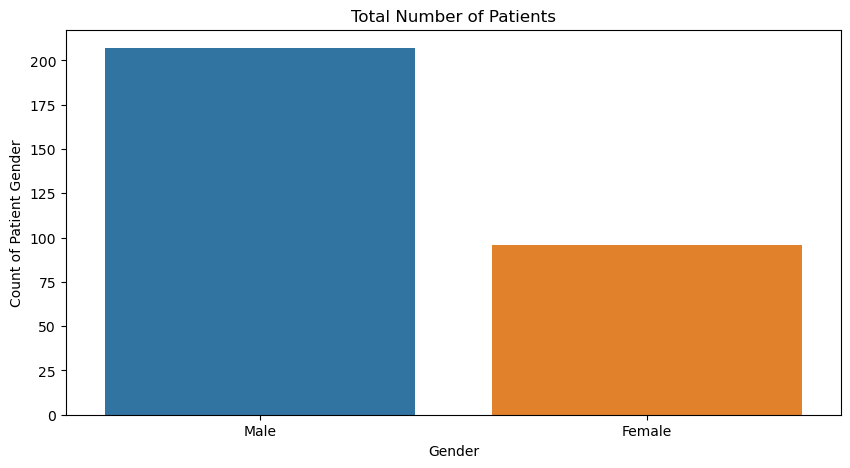

In [87]:

def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
    
df['gender'] = df['sex'].apply(gender)

plt.figure(figsize=(10,5))
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients');

there are more Males (about twice) among the patients population than Females

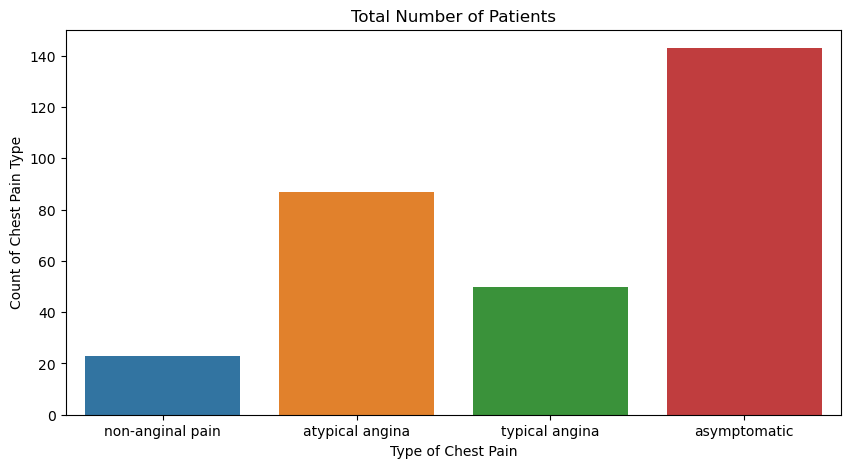

In [88]:
# chest_pain_type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

plt.figure(figsize = (10,5))
sns.countplot(x=df['cp_cat'])
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count of Chest Pain Type')
plt.title('Total Number of Patients');

there are 4 chest pain types find among patients with most patients falling within the asytomatic group. non-anginal pain is the least chest pain type among patients

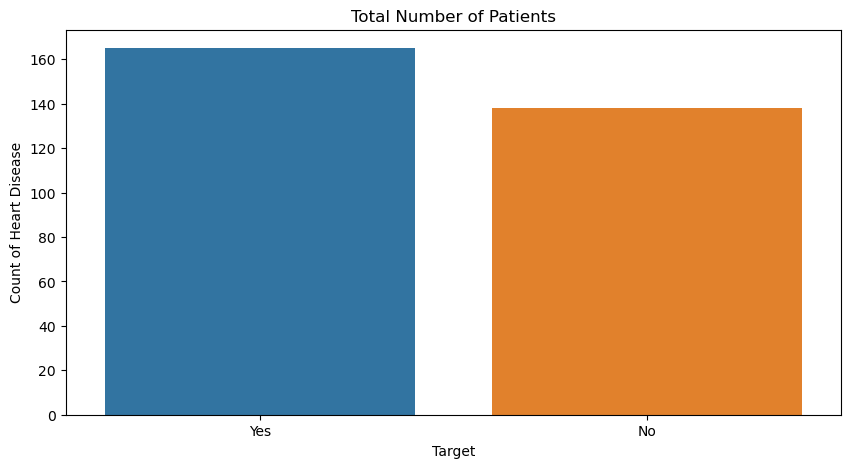

In [89]:
# target (1: Yes (has heart disease), 2: No (has no heart disease)

def label(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'
    
df['label'] = df['target'].apply(label)

plt.figure(figsize = (10,5))
sns.countplot(x=df['label'])
plt.xlabel('Target')
plt.ylabel('Count of Heart Disease')
plt.title('Total Number of Patients');

there are more patients with heart disease compared with those without heart disease among the target population

### Bivariate Analysis

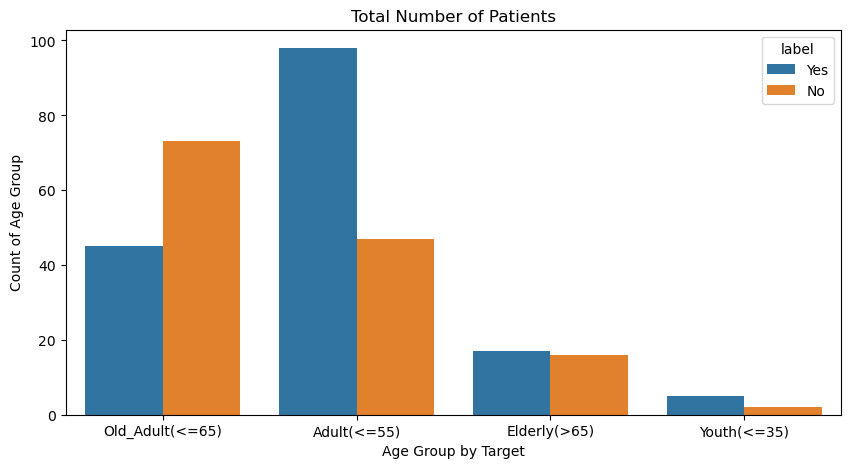

In [90]:
# Age group of patients by target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group by Target')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

there are more more patients with heart disease than those without heart disease among all the age groups except Old_Adult(<=65) age group.

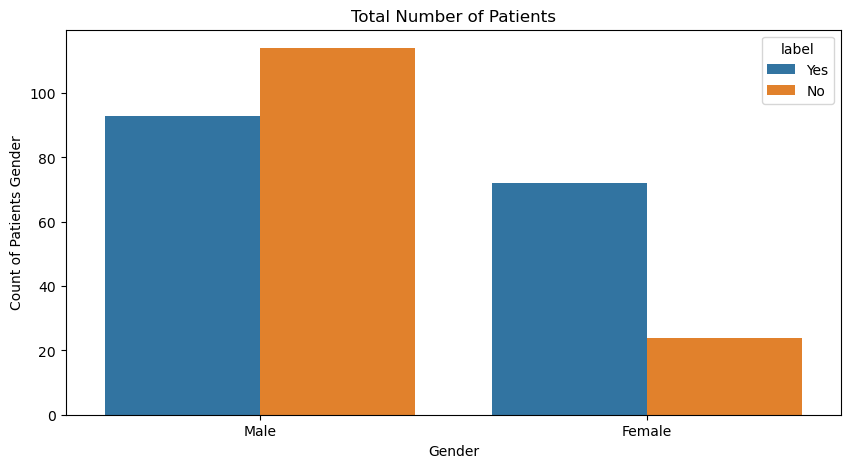

In [91]:
# Gender of patients by target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients');

Female though has lower patient number compared to Male, Females have more patients with heart disease in proportion to the Female population than that of Male.

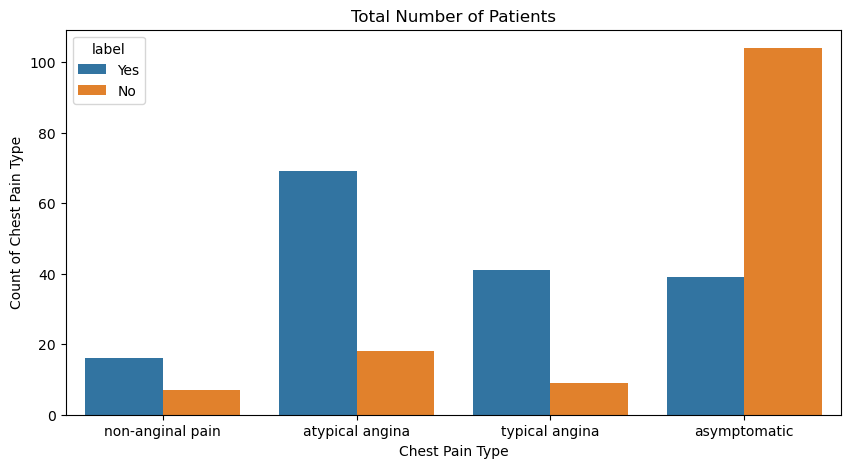

In [92]:
# Chest pain type of patients by target feature
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of Chest Pain Type')
plt.title('Total Number of Patients');

heart disease was more common in the population with chest pain. among the population who are asymptomatic, heart disease is lower than no heart disease

### Multivariate Analysis

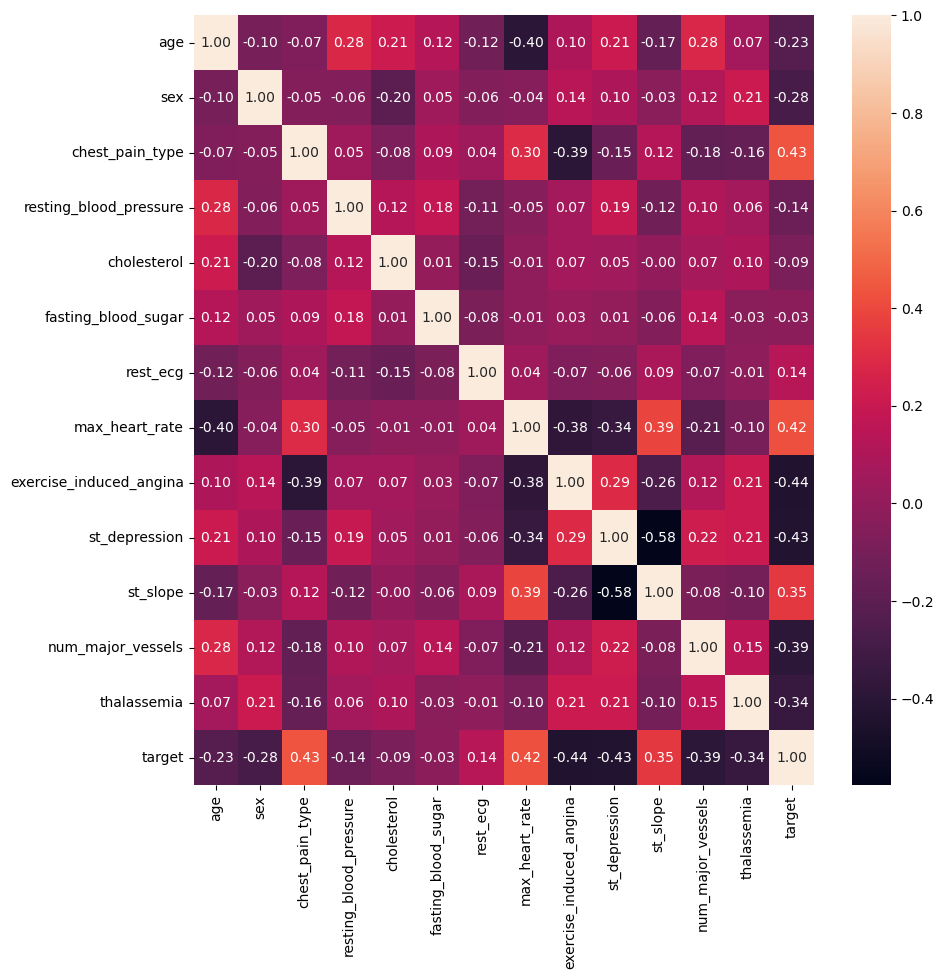

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10});

the feature with the strongest correlation with the target variable is exercise_induced_angina and st_depression

## Feature Engineering / Data Pre-Processing

In [94]:
# dataset segmentation: predictor variables and target variables
df1 = df.drop(['age_bracket', 'gender', 'cp_cat', 'label', 'target'], axis=1)

label = df[['target']]

In [95]:
df1.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [96]:
# check data types to ensure all are numerical
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [97]:
# dealing with outliers

# normalize the data 
scaler = MinMaxScaler()    # this scaler put all the numbers btn 0 and 1

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_MHR'] = scaler.fit_transform(df1['max_heart_rate'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'thalassemia'], axis=1, inplace=True)
df1.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_MHR,Scaled_thal
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.603053,0.333333
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.885496,0.666667
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.770992,0.666667


# ML Model Building & Evaluation

In [98]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

#### Logistic Regression

In [99]:
# model building

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

In [100]:
# model evaluation

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred))
print('Recall:', recall_score(y_test, lr_pred))
print('F1-Score:', f1_score(y_test, lr_pred))
print('AUC-ROC:', roc_auc_score(y_test, lr_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1-Score: 0.8524590163934426
AUC-ROC: 0.8545258620689655


Using the Logistic Regression algorithm, the model was 85% accurate, precision of 90% ie prediction of patients having heart disease who indeed had heart disease, 81% recall score ie patients with heart disease who were predicted correctly, F1-score is 85% and ROC-AUC score is also 85% ie the model is ability to distinguish between positives and negatives instances.

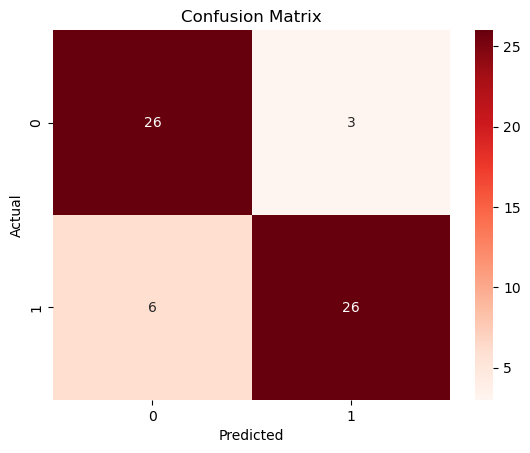

In [101]:
# confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix, the model made 52 predictions accurately with 26 True Positives and True Negatives each. Type 1 error (False Positives) is 3 out of total predictions while Type 2 error (False Negative) is 6. 

#### Random Forest Classifier

In [102]:
# model building

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [103]:
# model evaluation

print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1-Score:', f1_score(y_test, rf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rf_pred))

Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1-Score: 0.8253968253968254
AUC-ROC: 0.8200431034482759


Using the Random Forest Classifier, the model was 82% accurate, precision of 83% ie prediction of patients having heart disease who indeed had heart disease, 81% recall score ie patients with heart disease who were predicted correctly, F1-score is 83% and ROC-AUC score is also 82% ie the model is ability to distinguish between positives and negatives instances.

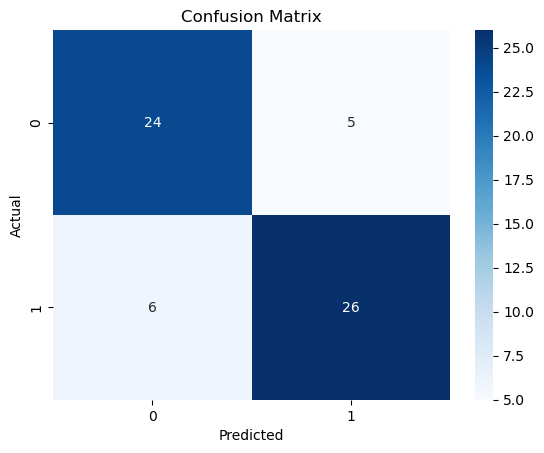

In [104]:
# confusion matrix
rfc = confusion_matrix(y_test, rf_pred)

# visualize confusion matrix
sns.heatmap(rfc, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix, the model made 51 predictions accurately with 26 True Positives and 25 True Negatives. Type 1 error (False Positives) is 5 out of total predictions while Type 2 error (False Negative) is 6. 

In [105]:
# 8 ML Algorithms

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [106]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [107]:
acc_list

{'XGB Classifier': ['83.61%'],
 'Random Forest': ['86.89%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['75.41%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree': ['80.33%'],
 'Logistic Regression': ['85.25%']}

In [108]:
print('Accuracy Score')
print('--------------')
s1 = pd.DataFrame(acc_list)
s1

Accuracy Score
--------------


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.61%,86.89%,75.41%,75.41%,65.57%,86.89%,80.33%,85.25%


In [109]:
print('Precision Score')
print('---------------')
s2 = pd.DataFrame(precision_list)
s2

Precision Score
---------------


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.67%,87.5%,79.31%,86.96%,65.71%,90.0%,91.67%,89.66%


In [110]:
print('Recall Score')
print('------------')
s3 = pd.DataFrame(recall_list)
s3

Recall Score
------------


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.25%,87.5%,71.88%,62.5%,71.88%,84.38%,68.75%,81.25%


In [111]:
print('ROC-AUC Score')
print('-------------')
s4 = pd.DataFrame(roc_list)
s4

ROC-AUC Score
-------------


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,83.73%,86.85%,75.59%,76.08%,65.25%,87.02%,80.93%,85.45%
